In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '.\\accidents_massifs.xlsx'
df = pd.read_excel(file)
pd.set_option('display.max_columns', 500)
df.head()

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\nzone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \ntête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \nneige,cohésion\nneige,type \ndépart,cause départ,dénivelé\n(mètres),largeur \ncassure\n(mètres),épaisseur\ncassure max. \n(cm),Unnamed: 30
0,1011-74-02,2010-12-04,13:05,74,la clusaz,aravis,alps,Aravis,combe borderan,"6°28'30"""" 45°53'10''",2350.0,NaN,NO,3.0,3,1,0,3,0,randonnée,hiking,montée,NaN,sèche,tendre,linéaire,accidentelle tiers,400,50.0,100.0,NaN
1,1011-74-08,2010-12-26,10:55,74,le reposoir,aravis,alps,Aravis,col de l'encrenaz,NaN,1950.0,30-34,S,3.0,1,1,0,1,0,randonnée,hiking,montée,3,sèche,dure,linéaire,accidentelle soi-même,30,15.0,20.0,NaN
2,1011-74-11,2011-03-20,12:05,74,magland,aravis,alps,Aravis,face nord pointe d'Areu,32t 0312804 5094955,2430.0,35-39,NO,3.0,1,1,1,0,0,randonnée,hiking,descente,3,sèche,tendre,linéaire,accidentelle soi-même,500,350.0,40.0,NaN
3,1011-63-01,2010-11-28,14:00,63,le mont dore,sancy,other,other,puy redon / couloir de l'envers du redon,"45°31'58.0"" 2°48'23""",1725.0,40-44,NO,2.0,1,0,0,1,0,randonnée,hiking,descente,NaN,sèche,tendre,linéaire,accidentelle soi-même,200,NaN,NaN,NaN
4,1213-74-02,2012-12-06,12:45,74,serraval,aravis,alps,Aravis,sulens,32t 0295672 5078087,1710.0,40-44,O,2.0,2,1,1,0,1,randonnée,hiking,traversée,NaN,sèche,tendre,linéaire,accidentelle soi-même,50,100.0,40.0,NaN


In [3]:
df_accidents = df[df["region"]=="alps"]
df_accidents = df_accidents[["date", "massif","massif_unique"]]
df_accidents.head()

,date,massif,massif_unique
0,2010-12-04,aravis,Aravis
1,2010-12-26,aravis,Aravis
2,2011-03-20,aravis,Aravis
4,2012-12-06,aravis,Aravis
5,2013-12-27,aravis,Aravis


In [4]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 568
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           511 non-null    datetime64[ns]
 1   massif         511 non-null    object        
 2   massif_unique  511 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 16.0+ KB


In [5]:
df_accidents.date = df_accidents.date.astype(str)

In [6]:
df.columns

Index(['code accident', 'date', 'heure', 'département', 'commune', 'massif',
       'region', 'massif_unique', 'site', 'coordonnées\nzone départ',
       'altitude', 'inclinaison', 'orientation', 'groupe', 'emportés',
       'ensevelis \ntête', 'décédés', 'blessées', 'indemnes', 'activité',
       'activite_regrouped', 'évolution', 'BRA', 'qualité \nneige',
       'cohésion\nneige', 'type \ndépart', 'cause départ',
       'dénivelé\n(mètres)', 'largeur \ncassure\n(mètres)',
       'épaisseur\ncassure max.  \n(cm)', 'Unnamed: 30'],
      dtype='object')

In [7]:
df = df[(df["date"]>"2010-9-30") & (df["date"]<"2019-10-01")]

In [8]:
df.activite_regrouped.value_counts()

hiking                                         230
off-piste (ski, snowboard) (ski, snowboard)    195
cross-country (ski, snowboard, snowshoes)       40
alpinisme                                       30
other                                           20
piste (ski, snowboard)                           8
Name: activite_regrouped, dtype: int64

In [9]:
df.massif_unique.value_counts()

Vanoise       71
Hte-tarent    54
Mont-Blanc    43
Hte-maurie    33
Queyras       29
Pelvoux       26
Chablais      25
Oisans        23
Aravis        21
hte-bigo      20
Belledone     18
Maurienne     18
Gdes-rouss    14
other         14
Beaufortin    13
Chartreuse    13
Mercantour    11
Ubaye         10
Thabor        10
Bauges         8
Vercors        8
Champsaur      8
Parpaillon     8
luchonnais     5
hte-ariege     5
capcir         4
aspe-ossau     3
Ht_Var-Ver     2
couseran       2
Devoluy        2
aure_lour      1
cerdagne       1
Name: massif_unique, dtype: int64

In [10]:
df.loc[df.massif_unique=="Belledone", 'massif_unique']="Belledonne"

In [11]:
df.region.value_counts()

alps        468
pyrenees     41
other        14
Name: region, dtype: int64

In [12]:
df.groupe.value_counts()

2.0     142
3.0      79
1.0      72
4.0      52
5.0      21
6.0      18
7.0      15
9.0       7
8.0       7
15.0      5
11.0      4
10.0      3
12.0      3
50.0      1
18.0      1
13.0      1
33.0      1
19.0      1
22.0      1
23.0      1
14.0      1
20.0      1
52.0      1
Name: groupe, dtype: int64

In [13]:
df.groupe = df.groupe.fillna(0)
df.groupe = df.groupe.astype(int)

In [14]:
df['groupe_edited'] = df.groupe.apply(lambda x:
                                     None if x == 0
                                     else 1 if x == 1
                                     else 2 if x == 2
                                     else 3 if x == 3
                                    else 4 if x == 4
                                    else 5 if x == 5
                                    else 6 if x == 6
                                    else 7 if x == 7
                                    else "8-10" if (x>7) & (x<11)
                                    else "11-14" if (x>10) & (x<15)
                                    else "more than 15")                                 

In [15]:
min(df.date)

Timestamp('2010-11-01 00:00:00')

In [16]:
avalanche_group = (df.groupe_edited.value_counts()).to_frame().reset_index()
avalanche_group.columns = ['size_of_group', 'sum_of_avalanche_accidents']
avalanche_group

,size_of_group,sum_of_avalanche_accidents
0,2,142
1,3,79
2,1,72
3,4,52
4,5,21
5,6,18
6,8-10,17
7,7,15
8,more than 15,13
9,11-14,9


In [17]:
df.altitude.value_counts()

2300.0    16
2600.0    13
2400.0    13
2200.0     9
2550.0     9
          ..
2747.0     1
1930.0     1
1550.0     1
3300.0     1
4300.0     1
Name: altitude, Length: 147, dtype: int64

In [18]:
df.altitude = df.altitude.fillna(0)
df.altitude = df.altitude.astype(int)

In [19]:
df['altitude_edited'] = df.altitude.apply(lambda x:
                                     None if x < 1000
                                    else "1000-1499" if x < 1500
                                    else "1500-1999" if x < 2000
                                    else "2000-2499" if x < 2500
                                    else "2500-2999" if x < 3000
                                    else "3000-3499" if x < 3500
                                    else "3500-3999" if x < 4000
                                   else "4000+")

In [20]:
df.altitude_edited.value_counts()

2000-2499    132
2500-2999     98
1500-1999     53
3000-3499     27
1000-1499     10
3500-3999      7
4000+          3
Name: altitude_edited, dtype: int64

In [21]:
df.heure.value_counts()

11:00    14
12:00    13
13:00    13
11:30    12
14:00    12
         ..
08:15     1
08:55     1
16:17     1
03:50     1
11:05     1
Name: heure, Length: 116, dtype: int64

In [22]:
np.dtype(df.heure)

dtype('O')

In [23]:
import datetime as dt
df['hour_of_day'] = (pd.to_datetime(df.heure)).dt.hour

In [24]:
df["hour_of_day"].unique()

array([13., 10., 12., 14., 15., 11., 16.,  9., nan, 17.,  8., 18.,  5.,
        3., 20., 19.])

In [25]:
hour_df = df[df["hour_of_day"]>0]

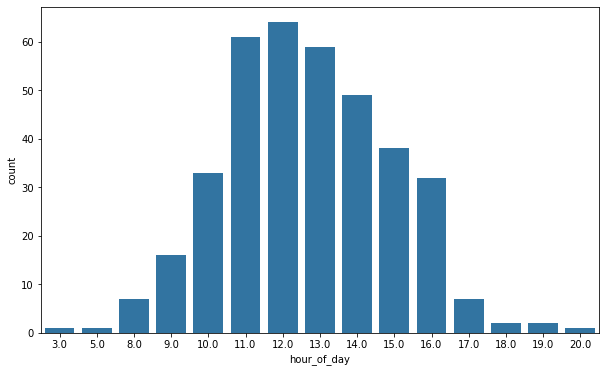

In [26]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
ax = sns.countplot(data=hour_df, x='hour_of_day', color=base_color)
ax.grid(False)

In [27]:
df.évolution.value_counts()

ski               238
descente           94
montée             36
à pieds            28
traversée          19
raquettes          11
snowboard           9
véhicule route      2
arrêt               1
ski fond            1
Name: évolution, dtype: int64

In [28]:
df["qualité \nneige"].value_counts()

sèche     116
3         106
2          34
4          34
humide     21
1           1
5           1
Name: qualité \nneige, dtype: int64

In [29]:
df["cohésion\nneige"].value_counts()

sèche     183
tendre     85
humide     39
dure       38
Name: cohésion\nneige, dtype: int64

In [30]:
df["cause départ"].value_counts()

linéaire                    264
accidentelle soi-même       125
naturelle                    14
accidentelle tiers            7
naturelle sérac/corniche      3
ponctuel                      3
Name: cause départ, dtype: int64

In [31]:
df_alps = df[df["region"]=="alps"]

In [32]:
df_alps.head()

,code accident,date,heure,département,commune,massif,region,massif_unique,site,coordonnées\nzone départ,altitude,inclinaison,orientation,groupe,emportés,ensevelis \ntête,décédés,blessées,indemnes,activité,activite_regrouped,évolution,BRA,qualité \nneige,cohésion\nneige,type \ndépart,cause départ,dénivelé\n(mètres),largeur \ncassure\n(mètres),épaisseur\ncassure max. \n(cm),Unnamed: 30,groupe_edited,altitude_edited,hour_of_day
0,1011-74-02,2010-12-04,13:05,74,la clusaz,aravis,alps,Aravis,combe borderan,"6°28'30"""" 45°53'10''",2350,NaN,NO,3,3,1,0,3,0,randonnée,hiking,montée,NaN,sèche,tendre,linéaire,accidentelle tiers,400,50.0,100.0,NaN,3,2000-2499,13.0
1,1011-74-08,2010-12-26,10:55,74,le reposoir,aravis,alps,Aravis,col de l'encrenaz,NaN,1950,30-34,S,3,1,1,0,1,0,randonnée,hiking,montée,3,sèche,dure,linéaire,accidentelle soi-même,30,15.0,20.0,NaN,3,1500-1999,10.0
2,1011-74-11,2011-03-20,12:05,74,magland,aravis,alps,Aravis,face nord pointe d'Areu,32t 0312804 5094955,2430,35-39,NO,3,1,1,1,0,0,randonnée,hiking,descente,3,sèche,tendre,linéaire,accidentelle soi-même,500,350.0,40.0,NaN,3,2000-2499,12.0
4,1213-74-02,2012-12-06,12:45,74,serraval,aravis,alps,Aravis,sulens,32t 0295672 5078087,1710,40-44,O,2,2,1,1,0,1,randonnée,hiking,traversée,NaN,sèche,tendre,linéaire,accidentelle soi-même,50,100.0,40.0,NaN,2,1500-1999,12.0
5,1314-74-03,2013-12-27,10:45,74,la clusaz,aravis,alps,Aravis,combe de torchere,"45°53'25"" / 6°29'15""",2375,30-34,NO,3,2,2,2,0,0,hors-piste,"off-piste (ski, snowboard) (ski, snowboard)",ski,descente,4,sèche,tendre,linéaire,accidentelle soi-même,125.0,115.0,100.0,3,2000-2499,10.0


In [33]:
df_alps_sum_aval = df_alps[["massif_unique", "code accident"]]

In [34]:
df_alps_sum_aval = df_alps_sum_aval.groupby("massif_unique").count().reset_index().sort_values(by="code accident", ascending=False)
df_alps_sum_aval.columns=["massif","sum_of_avalanches"]
df_alps_sum_aval

,massif,sum_of_avalanches
21,Vanoise,71
11,Hte-tarent,54
14,Mont-Blanc,43
10,Hte-maurie,33
18,Queyras,29
17,Pelvoux,26
4,Chablais,25
15,Oisans,23
0,Aravis,21
12,Maurienne,18


In [35]:
import geopandas as gpd
# reading shapefile of massifs in french Alps
gdf_alps = gpd.read_file(r".\\shapefile\\massifs_alpes_2154.shp")

In [36]:
aval_accidents_viz = pd.merge(gdf_alps, df_alps_sum_aval, how="left", left_on="nom_reduit", right_on="massif")

In [37]:
aval_accidents_viz

,massif_num,nom,nom_reduit,superficie,perimetre,geometry,massif,sum_of_avalanches
0,1,Chablais,Chablais,1385.316376,170.748079,"POLYGON ((999869.605 6556953.256, 999013.523 6...",Chablais,25
1,2,Aravis,Aravis,1073.660018,129.974582,"POLYGON ((976925.610 6556341.034, 978673.707 6...",Aravis,21
2,3,Mont-Blanc,Mont-Blanc,585.532682,125.642640,"POLYGON ((995389.567 6528045.104, 994136.335 6...",Mont-Blanc,43
3,4,Bauges,Bauges,872.270863,122.259312,"POLYGON ((946630.789 6532687.729, 947533.532 6...",Bauges,8
4,5,Beaufortin,Beaufortin,755.453226,116.226856,"POLYGON ((990566.082 6523570.533, 990407.893 6...",Beaufortin,13
5,6,Haute-Tarentaise,Hte-tarent,642.066618,141.562943,"POLYGON ((1018903.144 6493855.250, 1018430.597...",Hte-tarent,54
6,10,Vanoise,Vanoise,1218.452875,170.747060,"POLYGON ((991482.725 6503181.795, 993104.466 6...",Vanoise,71
7,9,Maurienne,Maurienne,917.119330,172.057111,"POLYGON ((983410.901 6466547.737, 983726.454 6...",Maurienne,18
8,7,Chartreuse,Chartreuse,846.994238,120.161035,"POLYGON ((934227.542 6488155.490, 934469.883 6...",Chartreuse,13
9,8,Belledonne,Belledonne,993.456150,154.882390,"POLYGON ((950810.720 6469559.152, 949675.761 6...",Belledonne,18


In [38]:
aval_accidents_viz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   massif_num         23 non-null     int64   
 1   nom                23 non-null     object  
 2   nom_reduit         23 non-null     object  
 3   superficie         23 non-null     float64 
 4   perimetre          23 non-null     float64 
 5   geometry           23 non-null     geometry
 6   massif             23 non-null     object  
 7   sum_of_avalanches  23 non-null     int64   
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 1.6+ KB


In [39]:
from bokeh.io import save, output_notebook
from bokeh.models import (ColorBar,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper)
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

In [40]:
import json
geosource = GeoJSONDataSource(geojson = aval_accidents_viz.to_json())

In [41]:
# define color palettes
palette = brewer['YlGnBu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# instantiate LinearColorMapper that linearly maps numbers in a range into a sequence of colors
# and nan values will be colored in grey
color_mapper = LinearColorMapper(palette = palette, low = 2, high = 80, nan_color = '#d9d9d9')

# create color bar
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 400, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',)

In [42]:
# create figure object
p = figure(title = 'Avalanches accidents from 10/2010 till 09/2019 in massifs of french Alps', 
           plot_height = 800,
           plot_width = 600, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [43]:
# add patch renderer to figure
massifs = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'sum_of_avalanches',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.20, 
                   fill_alpha = 1)

In [44]:
# create hover tool
p.add_tools(HoverTool(renderers = [massifs],
                      tooltips = [('massif','@nom'),
                                ('sum_of_avalanches','@sum_of_avalanches')]))

p.add_layout(color_bar, 'below')

In [45]:
# final visualization can be seen as html page
output_notebook()
show(p)

Loading BokehJS ...